## Trajectory equations:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sympy import *
init_printing()

In [34]:
dv_i_prll, dv_i_perp = symbols("dv_i_prll, dv_i_perp")
av_a_prll, av_a_perp = symbols("a_prll, a_perp")
v_e = symbols("v_e")
t = symbols("t")
q_e, Q_i, m, M = symbols("q_e, Q_i, m, M")
rho, rho_0, rho_tmp = symbols("rho, rho_0, rho_tmp")
phi = symbols("varphi")
R = symbols("R")
nu, n_e = symbols("nu, n_e")
j = symbols("j")
c, eps0 = symbols("c, epsilon_0")
r, a, b = symbols("r, a, b")

Momentum transfer at single collision:
$$
\begin{gather*}
  \Delta v_{i \parallel} = 2 \frac{m}{M} v_e \cos^2 \varphi 
  \\
  \Delta v_{i \perp} = 2 \frac{m}{M} v_e \sin \varphi \cos \varphi 
\end{gather*}
$$

For Coulomb potential (cf. paper eq 2, LL1 paragraph 19):
$$
\begin{gather*}
  \tan \varphi = \frac{ \rho }{ \rho_0 } 
  \\
  \rho_0 = \frac{ q_e Q_i }{m v_e^2} 
\end{gather*}
$$
where $\rho$ is an impact parameter and $\rho_0$ is an impact parameter corresponding to perpendicular electron rebound  ( $2 \phi = 90^{\circ} \rightarrow \phi = 45^{\circ}$ ).

In [5]:
vprll_eq = Eq( dv_i_prll, 2 * m/M * v_e * cos(phi)**2)
vperp_eq = Eq( dv_i_perp, 2 * m/M * v_e * sin(phi) * cos(phi) )
display( vprll_eq, vperp_eq )
eq_phi = Eq( phi, atan( rho / rho_0 ) )
display( eq_phi )

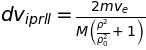

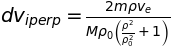

In [6]:
vprll_eq = Eq(vprll_eq.lhs, vprll_eq.rhs.subs( [(phi, eq_phi.rhs)] ) )
vperp_eq = Eq(vperp_eq.lhs, vperp_eq.rhs.subs( [(phi, eq_phi.rhs)] ) )
display( vprll_eq, vperp_eq )

Averaging over impact parameter for parallel component:

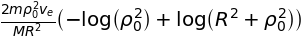

In [7]:
av_dv_i_prll = simplify( integrate( vprll_eq.rhs * 2 * pi * rho, (rho, 0, R) ) / integrate( 2 * pi * rho, (rho, 0, R) ) )
av_dv_i_prll = logcombine( av_dv_i_prll )
display( av_dv_i_prll )

For perpendicular component the equation is unnecessary compex:

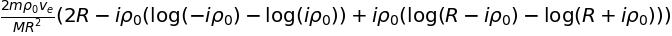

In [8]:
av_dv_i_perp = simplify( integrate( vperp_eq.rhs * 2 * pi * rho, (rho, 0, R) ) / integrate( 2 * pi * rho, (rho, 0, R) ) )
av_dv_i_perp = logcombine( av_dv_i_perp )
display( av_dv_i_perp )

Instead: (cf. https://www.wolframalpha.com/input/?i=integrate(+a*+r**2+%2F+(b*r**2+%2B+c),+r+) ):
$$
\begin{gather*}
  \int \frac{a r^2}{b r^2 + c} dr = 
  \frac{ a r }{b} - \frac{a \sqrt{c} \arctan \big[ (b/c)^{1/2} r \big] }{ b^{3/2} }
\end{gather*}
$$
with
$$
\begin{gather*}
  a = 4 \pi m v_e
  \quad
  b = \frac{M}{\rho_0}
  \quad 
  c = M \rho_0
\end{gather*}
$$
So:

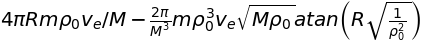

In [53]:
a = 4 * pi * m * v_e
b = M / rho_0
c = M * rho_0
av_dv_i_perp = a * r / b - a * sqrt(c) * atan( sqrt(b/c) * r ) / b**3/2
av_dv_i_perp = av_dv_i_perp.subs([(r, R)]) - av_dv_i_perp.subs([(r, 0)])
av_dv_i_perp = expand( av_dv_i_perp )
display( av_dv_i_perp )

Acceleration equals to speed gained in single collision multiplied by number of collisions per second:

Number of collisions per second:
$$
\begin{gather*}
  \nu = n_e v_e \pi R^2
\end{gather*}
$$    

For parallel component:

In [9]:
nu_eq = Eq(nu, n_e * v_e * pi * R**2 )
display( nu_eq )
aprll_eq = Eq( av_a_prll, simplify( av_dv_i_prll * nu_eq.rhs ) )
display( aprll_eq )

It is more convenient to use current or current density instead of concentration of electrons:
$$
\begin{gather*}
  j = n_e v_e q_e
\end{gather*}
$$    

In [38]:
aprll_eq = Eq( aprll_eq.lhs, (aprll_eq.rhs ).subs([(n_e * v_e, j / q_e )]) )
aprll_eq = Eq( aprll_eq.lhs, aprll_eq.rhs.subs([(rho_0 * rho_0 * v_e, rho_0 * v_e * q_e * Q_i / (m * v_e**2) )]) )
aprll_eq

For perpendicular component:

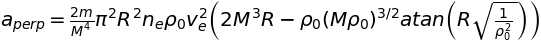

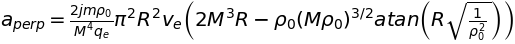

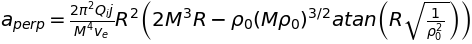

In [59]:
aperp_eq = Eq( av_a_perp, simplify( av_dv_i_perp * nu_eq.rhs ) )
display( aperp_eq )
aperp_eq = Eq( aperp_eq.lhs, aperp_eq.rhs.subs([(n_e * v_e, j / q_e )]) )
display( aperp_eq )
aperp_eq = Eq( aperp_eq.lhs, aperp_eq.rhs.subs([(rho_0 * v_e, v_e * q_e * Q_i / (m * v_e**2) )]) )
display( aperp_eq )